In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path=r""   # paste the file path
df = pd.read_excel(file_path)
df.head()

,Admin_Unit_Code,Sub_Unit_Code,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,...,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Previously_Obs,Initial_Three_Min_Cnt
0,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,CHSP,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True
1,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,EABL,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,False
2,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,GRSP,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True
3,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,EABL,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True
4,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,FISP,False,True,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True


In [3]:
xls = pd.ExcelFile(file_path, engine='openpyxl')

# List all sheet names
print(xls.sheet_names)

['ANTI', 'CATO', 'CHOH', 'GWMP', 'HAFE', 'MANA', 'MONO', 'NACE', 'PRWI', 'ROCR', 'WOTR']


In [4]:
all_sheets = pd.read_excel(file_path, sheet_name=None, engine='openpyxl')
df_ANTI = all_sheets['ANTI']
df_CATO = all_sheets['CATO']
df_CHOH = all_sheets['CHOH']
df_GWMP = all_sheets['GWMP']
df_HAFE = all_sheets['HAFE']
df_MANA = all_sheets['MANA']
df_MONO = all_sheets['MONO']
df_NACE = all_sheets['NACE']
df_PRWI = all_sheets['PRWI']
df_ROCR = all_sheets['ROCR']
df_WOTR = all_sheets['WOTR']

In [ ]:
combined_df = pd.concat(all_sheets.values(), ignore_index=True)
combined_df.head()

In [6]:
# Load all sheets
all_sheets = pd.read_excel(file_path, sheet_name=None, engine='openpyxl')
df_list = []

for name, sheet in all_sheets.items():
    # Drop rows where all columns are NaN
    sheet_clean = sheet.dropna(how='all')
    
    # Only process non-empty sheets
    if not sheet_clean.empty:
        sheet_clean['SheetName'] = name  # Tag the sheet name
        df_list.append(sheet_clean)

# Combine only valid sheets
combined_df = pd.concat(df_list, ignore_index=True)

# Preview
combined_df.head()


,Admin_Unit_Code,Sub_Unit_Code,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,...,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Previously_Obs,Initial_Three_Min_Cnt,SheetName
0,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True,ANTI
1,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,False,ANTI
2,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True,ANTI
3,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True,ANTI
4,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,False,True,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True,ANTI


In [7]:
print("Rows:", combined_df.shape[0], "Columns:", combined_df.shape[1])

Rows: 8531 Columns: 30


In [8]:
print("\nColumns:")
print(combined_df.columns.tolist())


Columns:
['Admin_Unit_Code', 'Sub_Unit_Code', 'Plot_Name', 'Location_Type', 'Year', 'Date', 'Start_Time', 'End_Time', 'Observer', 'Visit', 'Interval_Length', 'ID_Method', 'Distance', 'Flyover_Observed', 'Sex', 'Common_Name', 'Scientific_Name', 'AcceptedTSN', 'TaxonCode', 'AOU_Code', 'PIF_Watchlist_Status', 'Regional_Stewardship_Status', 'Temperature', 'Humidity', 'Sky', 'Wind', 'Disturbance', 'Previously_Obs', 'Initial_Three_Min_Cnt', 'SheetName']


In [9]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8531 entries, 0 to 8530
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Admin_Unit_Code              8531 non-null   object        
 1   Sub_Unit_Code                0 non-null      float64       
 2   Plot_Name                    8531 non-null   object        
 3   Location_Type                8531 non-null   object        
 4   Year                         8531 non-null   int64         
 5   Date                         8531 non-null   datetime64[ns]
 6   Start_Time                   8531 non-null   object        
 7   End_Time                     8531 non-null   object        
 8   Observer                     8531 non-null   object        
 9   Visit                        8531 non-null   int64         
 10  Interval_Length              8531 non-null   object        
 11  ID_Method                    8530 non-null 

In [10]:
missing = combined_df.isnull().sum()
missing[missing > 0]

Sub_Unit_Code    8531
ID_Method           1
Distance         1394
AcceptedTSN        24
TaxonCode           2
dtype: int64

In [11]:
# Strip whitespaces from column names
combined_df.columns = combined_df.columns.str.strip()

In [12]:
# Standardize column names (optional, for consistency)
combined_df.columns = combined_df.columns.str.lower().str.replace(' ', '_')

In [13]:
# Percentage of missing values
print((combined_df.isnull().mean() * 100).sort_values(ascending=False))

sub_unit_code                  100.000000
distance                        16.340406
acceptedtsn                      0.281327
taxoncode                        0.023444
id_method                        0.011722
admin_unit_code                  0.000000
initial_three_min_cnt            0.000000
previously_obs                   0.000000
disturbance                      0.000000
wind                             0.000000
sky                              0.000000
humidity                         0.000000
temperature                      0.000000
regional_stewardship_status      0.000000
pif_watchlist_status             0.000000
aou_code                         0.000000
common_name                      0.000000
scientific_name                  0.000000
sex                              0.000000
flyover_observed                 0.000000
interval_length                  0.000000
visit                            0.000000
observer                         0.000000
end_time                         0

In [14]:
# Drop columns with too many missing values (e.g., >50%)
threshold = 0.5
combined_df = combined_df.loc[:, combined_df.isnull().mean() < threshold]

In [15]:
combined_df.duplicated().sum()

1705

In [16]:
combined_df = combined_df.drop_duplicates()

In [17]:
combined_df.head()

,admin_unit_code,plot_name,location_type,year,date,start_time,end_time,observer,visit,interval_length,...,pif_watchlist_status,regional_stewardship_status,temperature,humidity,sky,wind,disturbance,previously_obs,initial_three_min_cnt,sheetname
0,ANTI,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,0-2.5 min,...,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True,ANTI
1,ANTI,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,7.5 - 10 min,...,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,False,ANTI
2,ANTI,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,0-2.5 min,...,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True,ANTI
3,ANTI,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,0-2.5 min,...,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True,ANTI
4,ANTI,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,0-2.5 min,...,False,True,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True,ANTI


In [18]:
missing = combined_df.isnull().sum()
missing[missing > 0]

id_method        1
distance       597
acceptedtsn     19
taxoncode        2
dtype: int64

In [19]:
combined_df['acceptedtsn'].isnull().sum()
mean_value = combined_df['acceptedtsn'].mean()
combined_df['acceptedtsn'] = combined_df['acceptedtsn'].fillna(mean_value)

In [20]:
combined_df = combined_df.dropna(subset=['distance'])
combined_df = combined_df.dropna(subset=['id_method'])
combined_df = combined_df.dropna(subset=['taxoncode'])

In [21]:
missing = combined_df.isnull().sum()
missing[missing > 0]

Series([], dtype: int64)

In [27]:
combined_df['temperature'].describe()

count    6227.000000
mean       22.864782
std         4.693123
min        11.000000
25%        20.000000
50%        22.000000
75%        26.000000
max        37.000000
Name: temperature, dtype: float64

In [25]:
combined_df['temperature'] = combined_df['temperature'].astype('int64')

In [28]:
combined_df['temperature'].min(), combined_df['temperature'].max()

(11, 37)

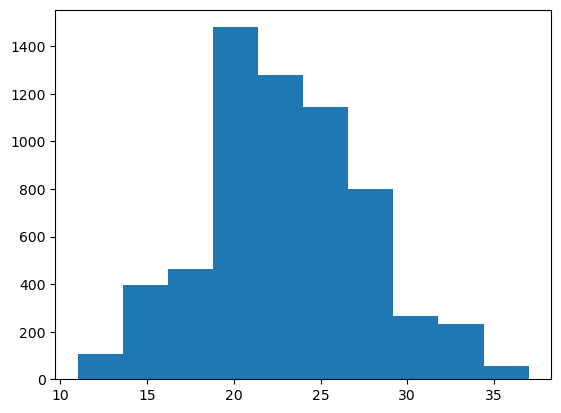

In [80]:
plt.hist(combined_df['temperature'])
plt.show()

In [81]:
combined_df['admin_unit_code'].value_counts()

admin_unit_code
ANTI    2939
MONO    1882
MANA    1307
HAFE      99
Name: count, dtype: int64

In [83]:
combined_df['interval_length'].value_counts()

interval_length
0-2.5 min       3189
2.5 - 5 min     1307
5 - 7.5 min      922
7.5 - 10 min     809
Name: count, dtype: int64

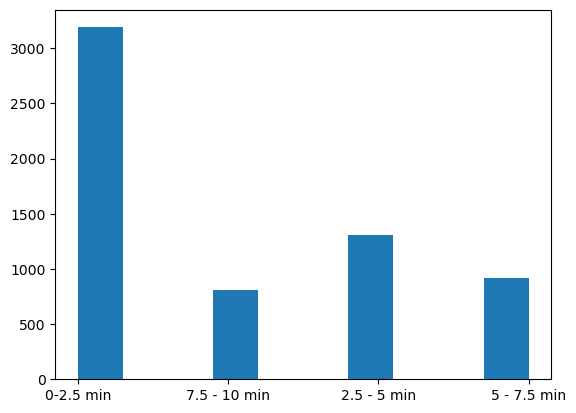

In [78]:
plt.hist(combined_df['interval_length'])
plt.show()

In [76]:
combined_df['wind'].value_counts()

wind
Light air movement (1-3 mph) smoke drifts     3242
Light breeze (4-7 mph) wind felt on face      1758
Calm (< 1 mph) smoke rises vertically         1029
Gentle breeze (8-12 mph), leaves in motion     198
Name: count, dtype: int64

In [29]:
combined_df['sky'].value_counts()

sky
Partly Cloudy          2928
Clear or Few Clouds    2170
Cloudy/Overcast         921
Fog                     136
Mist/Drizzle             72
Name: count, dtype: int64

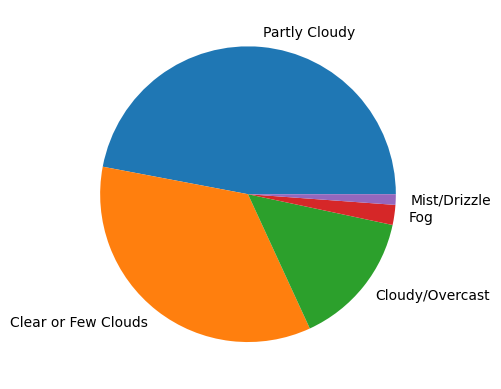

In [34]:
x = [2928,2170,921,136,72]
plt.pie(x, labels=['Partly Cloudy', 'Clear or Few Clouds','Cloudy/Overcast','Fog','Mist/Drizzle'], explode=[0,0,0,0,0])
plt.show()

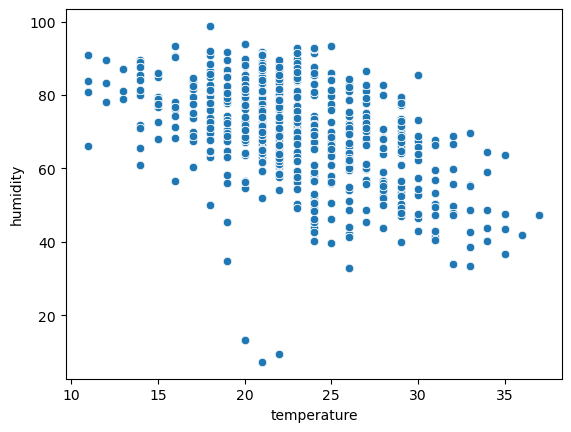

In [45]:
sns.scatterplot(data=combined_df, x="temperature", y="humidity")
plt.show()


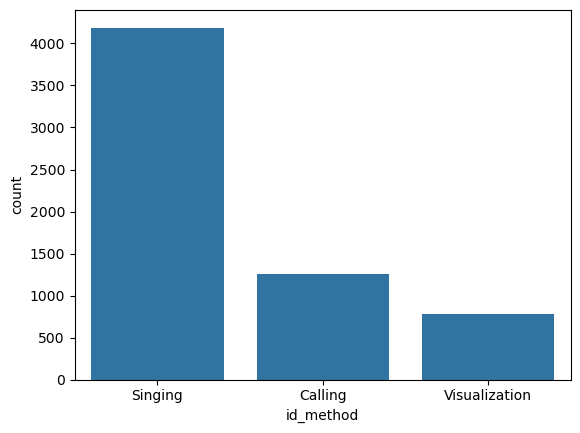

In [47]:
sns.countplot(data = combined_df, x = "id_method")
plt.show()

Text(0.5, 1.0, 'Observers Unit Count')

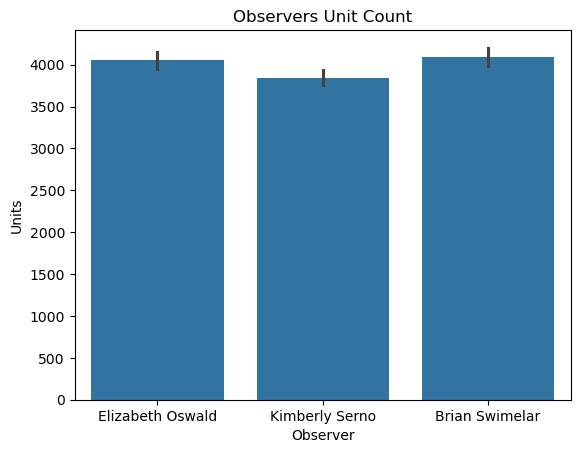

In [56]:
admin_unit_code = combined_df['admin_unit_code'].index.values
sns.barplot(data = combined_df,x = "observer", y = admin_unit_code)
plt.xlabel('Observer')
plt.ylabel('Units')
plt.title('Observers Unit Count')

In [ ]:
import pymysql
import mysql.connector
from mysql.connector import Error

connection = pymysql.connect(
        host='',
        user='',
        password='',
        database='',
        charset='utf8mb4',
        cursorclass=pymysql.cursors.DictCursor
    )


cursor = connection.cursor()
create_table_query ="""
        CREATE TABLE IF NOT EXISTS Grassland (
                    id INT AUTO_INCREMENT PRIMARY KEY,
                    Admin_Unit_Code VARCHAR(14),
                    Plot_Name VARCHAR(19),
                    Location_Type VARCHAR(16),
                    `Year` INT,
                    `Date` DATETIME,
                    Start_Time VARCHAR(18),
                    End_Time VARCHAR(18),
                    Observer VARCHAR(26),
                    `Visit` INT,
                    Interval_Length VARCHAR(22),
                    ID_Method VARCHAR(23),
                    `Distance` VARCHAR(25),
                    Flyover_Observed BOOLEAN,
                    Sex VARCHAR(22),
                    Common_Name VARCHAR(34),
                    Scientific_Name VARCHAR(34),
                    AcceptedTSN FLOAT,
                    AOU_Code VARCHAR(14),
                    PIF_Watchlist_Status BOOLEAN,
                    Regional_Stewardship_Status BOOLEAN,
                    Temperature FLOAT,
                    Humidity FLOAT,
                    Sky VARCHAR(29),
                    Wind VARCHAR(51),
                    Disturbance VARCHAR(34),
                    Previously_Obs BOOLEAN,
                    Initial_Three_Min_Cnt BOOLEAN
                ) 
"""
cursor.execute(create_table_query)


insert_query ='''
        INSERT INTO Grassland (Admin_Unit_Code, Plot_Name, Location_Type,
                        `Year`, `Date`, Start_Time, End_Time, Observer, `Visit`, Interval_Length,
                        ID_Method, `Distance`, Flyover_Observed,Sex, Common_Name, Scientific_Name,
                        AcceptedTSN, AOU_Code, PIF_Watchlist_Status,
                        Regional_Stewardship_Status, Temperature, Humidity, Sky, Wind,
                        Disturbance,Previously_Obs, Initial_Three_Min_Cnt) 
                        VALUES (%s, %s, %s, %s, %s,
                        %s, %s, %s, %s, %s, %s, %s,
                        %s, %s, %s, %s, %s, %s,
                        %s, %s, %s, %s, %s,
                        %s, %s, %s, %s)

'''

combined_df.dropna(inplace=True)

combined_df[(combined_df['date']!='nan')]

df1 = combined_df.where((pd.notnull(combined_df)), None)


data_to_insert = df1[[
            'admin_unit_code', 'plot_name', 'location_type', 'year', 'date',
            'start_time', 'end_time', 'observer', 'visit', 'interval_length', 'id_method',
            'distance', 'flyover_observed','sex', 'common_name', 'scientific_name', 'acceptedtsn',
            'aou_code', 'pif_watchlist_status', 'regional_stewardship_status',
            'temperature', 'humidity', 'sky', 'wind', 'disturbance', 'previously_obs','initial_three_min_cnt'
]].values.tolist()


cursor.executemany(insert_query, data_to_insert)
connection.commit()

In [75]:
connection.close()